In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [20]:
df_sales_target = pd.read_csv('SalesTarget.csv')
df_order_details = pd.read_csv('OrderDetails.csv')
df_list_orders = pd.read_csv('Orders.csv')

print("--- Sales Target Data (df_sales_target) ---")
print(df_sales_target.head())
print("\n--- Order Details Data (df_order_details) ---")
print(df_order_details.head())
print("\n--- List of Orders Data (df_list_orders) ---")
print(df_list_orders.head())

--- Sales Target Data (df_sales_target) ---
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4              Aug-18  Furniture  10900.0

--- Order Details Data (df_order_details) ---
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

--- List of Orders Data (df_list_orders) ---
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03

In [3]:
print("\n--- Initial Inspection of df_sales_target ---")
print(df_sales_target.info())
print("\nUnique values in 'Month of Order Date' before conversion:")
print(df_sales_target['Month of Order Date'].value_counts())

# Cleaning Step: Convert 'Month of Order Date' to datetime
# The format is 'Mon-YY', e.g., 'Apr-18'
df_sales_target['Month of Order Date'] = pd.to_datetime(df_sales_target['Month of Order Date'], format='%b-%y')

print("\n--- df_sales_target after cleaning ---")
print(df_sales_target.info())
print(df_sales_target.head())


--- Initial Inspection of df_sales_target ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes
None

Unique values in 'Month of Order Date' before conversion:
Month of Order Date
Apr-18    3
May-18    3
Jun-18    3
Jul-18    3
Aug-18    3
Sep-18    3
Oct-18    3
Nov-18    3
Dec-18    3
Jan-19    3
Feb-19    3
Mar-19    3
Name: count, dtype: int64

--- df_sales_target after cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month of Order Date  36 non-n

In [4]:
print("\n--- Initial Inspection of df_order_details ---")
print(df_order_details.info())
print("\nNumber of duplicate rows in df_order_details:", df_order_details.duplicated().sum())

# Reconfirming:
if df_order_details.isnull().sum().sum() == 0 and df_order_details.duplicated().sum() == 0:
    print("\ndf_order_details is clean with no missing values or duplicates.")
else:
    print("\nFurther cleaning might be needed for df_order_details if issues are found.")

print(df_order_details.head())


--- Initial Inspection of df_order_details ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
None

Number of duplicate rows in df_order_details: 0

df_order_details is clean with no missing values or duplicates.
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronic

In [5]:
print("\n--- Initial Inspection of df_list_orders ---")
print(df_list_orders.info())
print("\nNumber of duplicate rows in df_list_orders:", df_list_orders.duplicated().sum())
print("\nMissing values before cleaning:")
print(df_list_orders.isnull().sum())

# Cleaning Step 1: Remove rows where all values are NaN
initial_rows = df_list_orders.shape[0]  #count initial rows
df_list_orders.dropna(how='all', inplace=True)  #remove rows with all NaN values
print(f"\nRemoved {initial_rows - df_list_orders.shape[0]} rows with all NaN values.")

# Cleaning Step 2: Remove duplicate rows
initial_rows = df_list_orders.shape[0]
df_list_orders.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df_list_orders.shape[0]} duplicate rows.")

# Cleaning Step 3: Convert 'Order Date' to datetime
# The format is 'DD-MM-YYYY', e.g., '01-04-2018'
df_list_orders['Order Date'] = pd.to_datetime(df_list_orders['Order Date'], format='%d-%m-%Y', errors='coerce')

# The format='%d-%m-%Y' argument specifies the expected format of the date strings in the 'Order Date' column (day-month-year). 
#The errors='coerce' argument tells pandas to replace any values that cannot be converted to datetime objects with NaT (Not a Time).

# Check if any NaT (Not a Time) values resulted from conversion errors
if df_list_orders['Order Date'].isnull().sum() > 0:
    print(f"Warning: {df_list_orders['Order Date'].isnull().sum()} invalid dates after conversion. Consider handling them.")
    # For this analysis, we'll proceed, but in a real scenario, you might investigate these.
    df_list_orders.dropna(subset=['Order Date'], inplace=True) # Dropping rows with invalid dates

print("\n--- df_list_orders after cleaning ---")
print(df_list_orders.info())
print(df_list_orders.head())
print("\nMissing values after cleaning:")
print(df_list_orders.isnull().sum())



--- Initial Inspection of df_list_orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None

Number of duplicate rows in df_list_orders: 59

Missing values before cleaning:
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

Removed 60 rows with all NaN values.
Removed 0 duplicate rows.

--- df_list_orders after cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      

# Sales Profitability Analysis


### Merge the List of Orders and Order Details datasets on the basis of Order ID. 

In [6]:
# Merge df_list_orders and df_order_details on 'Order ID'
# Using an inner merge only to keep records present in both dataframes.
df_merged_sales = pd.merge(df_list_orders, df_order_details, on='Order ID', how='inner')

print("--- Merged Sales Data (df_merged_sales) ---")
print(df_merged_sales.head())
print("\nMerged DataFrame Info:")
print(df_merged_sales.info())
print("\nNumber of rows after merge:", df_merged_sales.shape[0])
print("Number of unique Order IDs in merged data:", df_merged_sales['Order ID'].nunique())

--- Merged Sales Data (df_merged_sales) ---
  Order ID Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602 2018-04-01        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -

### Calculate the total sales (Amount) for each category across all orders.


--- Total Sales (Amount) by Category ---
Category
Electronics    165267.0
Clothing       139054.0
Furniture      127181.0
Name: Amount, dtype: float64


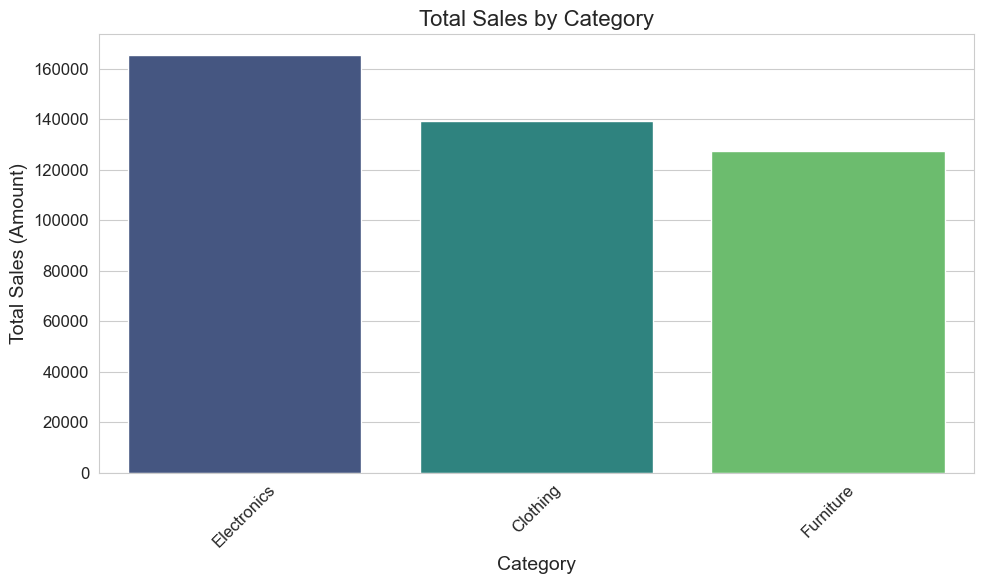

In [32]:
total_sales_by_category = df_merged_sales.groupby('Category')['Amount'].sum().sort_values(ascending=False)

print("\n--- Total Sales (Amount) by Category ---")
print(total_sales_by_category)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_category.index, y=total_sales_by_category.values, hue=total_sales_by_category.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For each category, calculate the average profit per order and total profit margin (profit as a percentage of Amount)


--- Category Profitability Analysis ---
      Category  Total_Sales  Total_Profit  Order_Count  Avg_Profit_Per_Order  \
0     Clothing     139054.0       11163.0          393             28.404580   
1  Electronics     165267.0       10494.0          204             51.441176   
2    Furniture     127181.0        2298.0          186             12.354839   

   Profit_Margin_%  
0         8.027817  
1         6.349725  
2         1.806874  


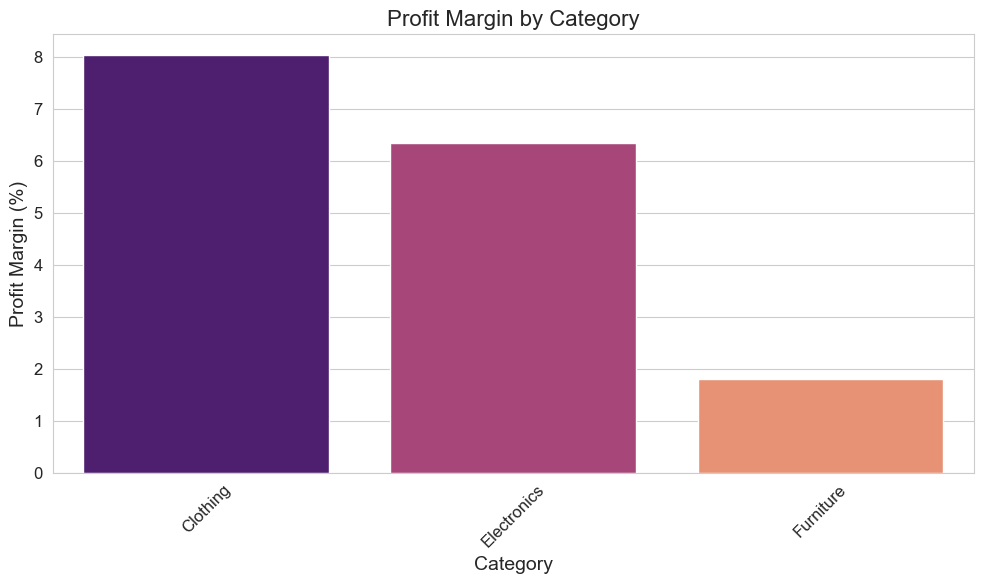

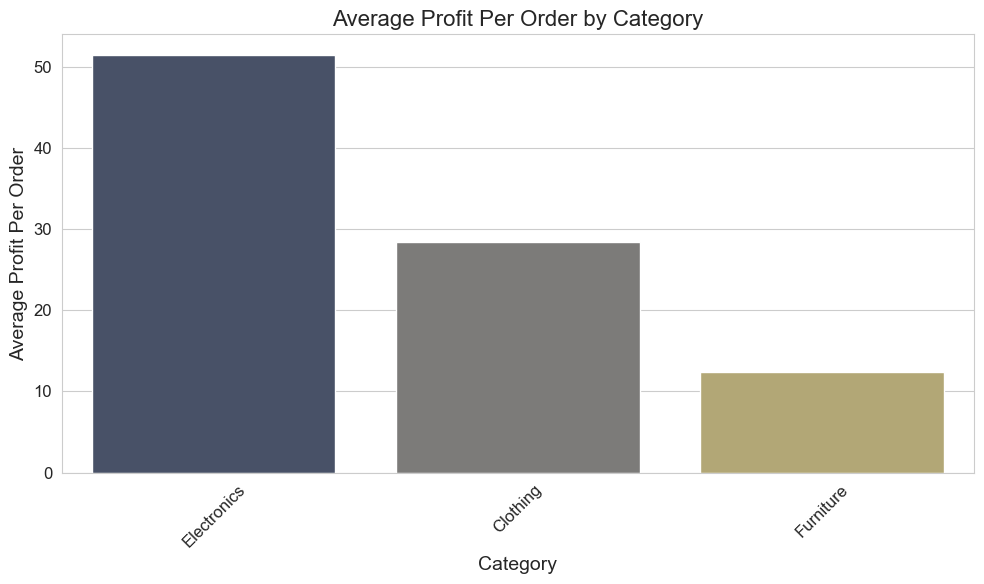

In [33]:
# Calculate total profit and total amount for each category
category_profit_analysis = df_merged_sales.groupby('Category').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order ID', 'nunique') # Count unique orders per category
).reset_index()

# Calculate Average Profit per Order
category_profit_analysis['Avg_Profit_Per_Order'] = category_profit_analysis['Total_Profit'] / category_profit_analysis['Order_Count']

# Calculate Total Profit Margin (as a percentage)
category_profit_analysis['Profit_Margin_%'] = (category_profit_analysis['Total_Profit'] / category_profit_analysis['Total_Sales']) * 100

print("\n--- Category Profitability Analysis ---")
print(category_profit_analysis.sort_values(by='Profit_Margin_%', ascending=False))

# Visualization of Profit Margin
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit_Margin_%', data=category_profit_analysis.sort_values(by='Profit_Margin_%', ascending=False), hue='Category', palette='magma')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Average Profit per Order
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Avg_Profit_Per_Order', data=category_profit_analysis.sort_values(by='Avg_Profit_Per_Order', ascending=False), hue='Category', palette='cividis')
plt.title('Average Profit Per Order by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Per Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print("\n--- Summary of Category Performance ---")
print("Categories ranked by Total Sales:")
print(total_sales_by_category)
print("\nCategories ranked by Profit Margin:")
print(category_profit_analysis.sort_values(by='Profit_Margin_%', ascending=False)[['Category', 'Profit_Margin_%']])
print("\nCategories ranked by Average Profit Per Order:")
print(category_profit_analysis.sort_values(by='Avg_Profit_Per_Order', ascending=False)[['Category', 'Avg_Profit_Per_Order']])

# Identify top and underperforming based on a combined view, focusing on Profit Margin as a key indicator of efficiency.
# Top performer: Highest Profit Margin and healthy sales.
# Underperformer: Lowest Profit Margin or even negative, potentially with low sales.

print("\n--- Identifying Top and Underperforming Categories ---")

top_category = category_profit_analysis.loc[category_profit_analysis['Profit_Margin_%'].idxmax()]
under_category = category_profit_analysis.loc[category_profit_analysis['Profit_Margin_%'].idxmin()]

print(f"\nTop Performing Category (by Profit Margin): {top_category['Category']}")
print(f"  - Total Sales: {top_category['Total_Sales']:.2f}")
print(f"  - Total Profit: {top_category['Total_Profit']:.2f}")
print(f"  - Avg Profit Per Order: {top_category['Avg_Profit_Per_Order']:.2f}")
print(f"  - Profit Margin: {top_category['Profit_Margin_%']:.2f}%")

print(f"\nUnderperforming Category (by Profit Margin): {under_category['Category']}")
print(f"  - Total Sales: {under_category['Total_Sales']:.2f}")
print(f"  - Total Profit: {under_category['Total_Profit']:.2f}")
print(f"  - Avg Profit Per Order: {under_category['Avg_Profit_Per_Order']:.2f}")
print(f"  - Profit Margin: {under_category['Profit_Margin_%']:.2f}%")


--- Summary of Category Performance ---
Categories ranked by Total Sales:
Category
Electronics    165267.0
Clothing       139054.0
Furniture      127181.0
Name: Amount, dtype: float64

Categories ranked by Profit Margin:
      Category  Profit_Margin_%
0     Clothing         8.027817
1  Electronics         6.349725
2    Furniture         1.806874

Categories ranked by Average Profit Per Order:
      Category  Avg_Profit_Per_Order
1  Electronics             51.441176
0     Clothing             28.404580
2    Furniture             12.354839

--- Identifying Top and Underperforming Categories ---

Top Performing Category (by Profit Margin): Clothing
  - Total Sales: 139054.00
  - Total Profit: 11163.00
  - Avg Profit Per Order: 28.40
  - Profit Margin: 8.03%

Underperforming Category (by Profit Margin): Furniture
  - Total Sales: 127181.00
  - Total Profit: 2298.00
  - Avg Profit Per Order: 12.35
  - Profit Margin: 1.81%



--- Furniture Target with Month-over-Month Change ---
   Month of Order Date   Category   Target  Target_MoM_Change_%
0           2018-04-01  Furniture  10400.0                  NaN
1           2018-05-01  Furniture  10500.0             0.961538
2           2018-06-01  Furniture  10600.0             0.952381
3           2018-07-01  Furniture  10800.0             1.886792
4           2018-08-01  Furniture  10900.0             0.925926
5           2018-09-01  Furniture  11000.0             0.917431
6           2018-10-01  Furniture  11100.0             0.909091
7           2018-11-01  Furniture  11300.0             1.801802
8           2018-12-01  Furniture  11400.0             0.884956
9           2019-01-01  Furniture  11500.0             0.877193
10          2019-02-01  Furniture  11600.0             0.869565
11          2019-03-01  Furniture  11800.0             1.724138


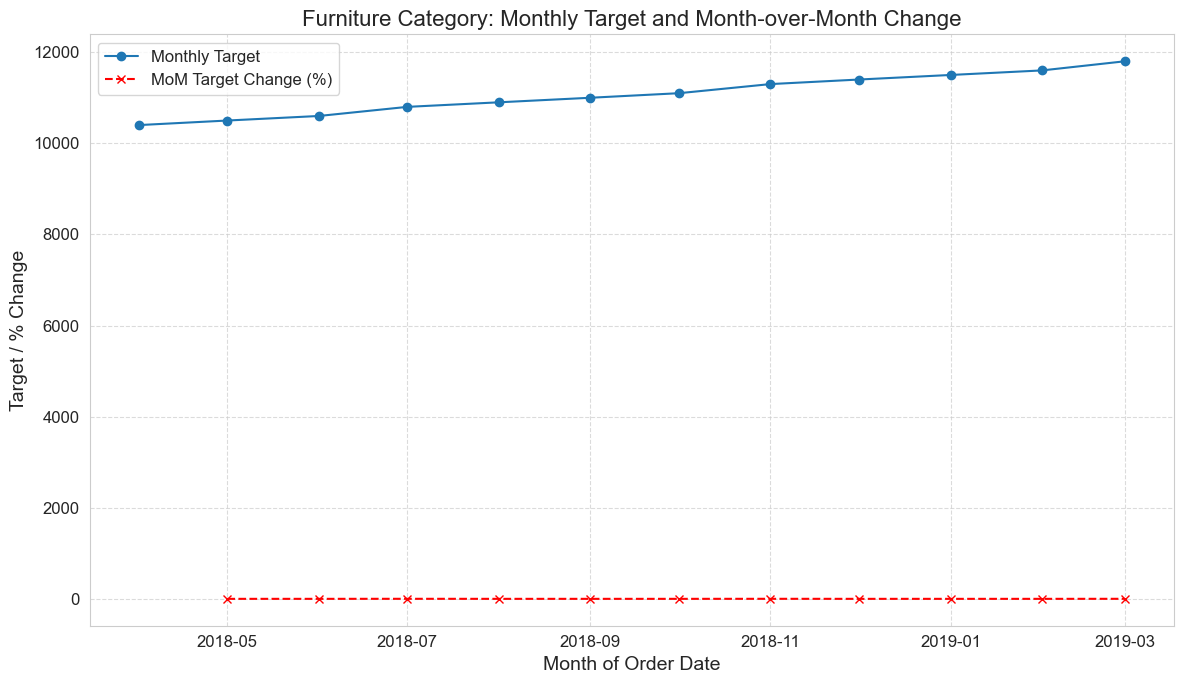

In [10]:
# Filter for 'Furniture' category targets
furniture_target = df_sales_target[df_sales_target['Category'] == 'Furniture'].copy()

# Sort by 'Month of Order Date' to ensure correct calculation of percentage change
furniture_target.sort_values(by='Month of Order Date', inplace=True)

# Calculate Month-over-Month Percentage Change in Target
# (Current Month Target - Previous Month Target) / Previous Month Target * 100
furniture_target['Target_MoM_Change_%'] = furniture_target['Target'].pct_change() * 100

print("\n--- Furniture Target with Month-over-Month Change ---")
print(furniture_target)

# Visualization of Furniture Target and MoM Change
plt.figure(figsize=(12, 7))
plt.plot(furniture_target['Month of Order Date'], furniture_target['Target'], marker='o', label='Monthly Target')
plt.plot(furniture_target['Month of Order Date'], furniture_target['Target_MoM_Change_%'], marker='x', linestyle='--', color='red', label='MoM Target Change (%)')
plt.title('Furniture Category: Monthly Target and Month-over-Month Change')
plt.xlabel('Month of Order Date')
plt.ylabel('Target / % Change')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



--- Furniture Target with Month-over-Month Change ---
   Month of Order Date   Category   Target  Target_MoM_Change_%
0           2018-04-01  Furniture  10400.0                  NaN
1           2018-05-01  Furniture  10500.0             0.961538
2           2018-06-01  Furniture  10600.0             0.952381
3           2018-07-01  Furniture  10800.0             1.886792
4           2018-08-01  Furniture  10900.0             0.925926
5           2018-09-01  Furniture  11000.0             0.917431
6           2018-10-01  Furniture  11100.0             0.909091
7           2018-11-01  Furniture  11300.0             1.801802
8           2018-12-01  Furniture  11400.0             0.884956
9           2019-01-01  Furniture  11500.0             0.877193
10          2019-02-01  Furniture  11600.0             0.869565
11          2019-03-01  Furniture  11800.0             1.724138


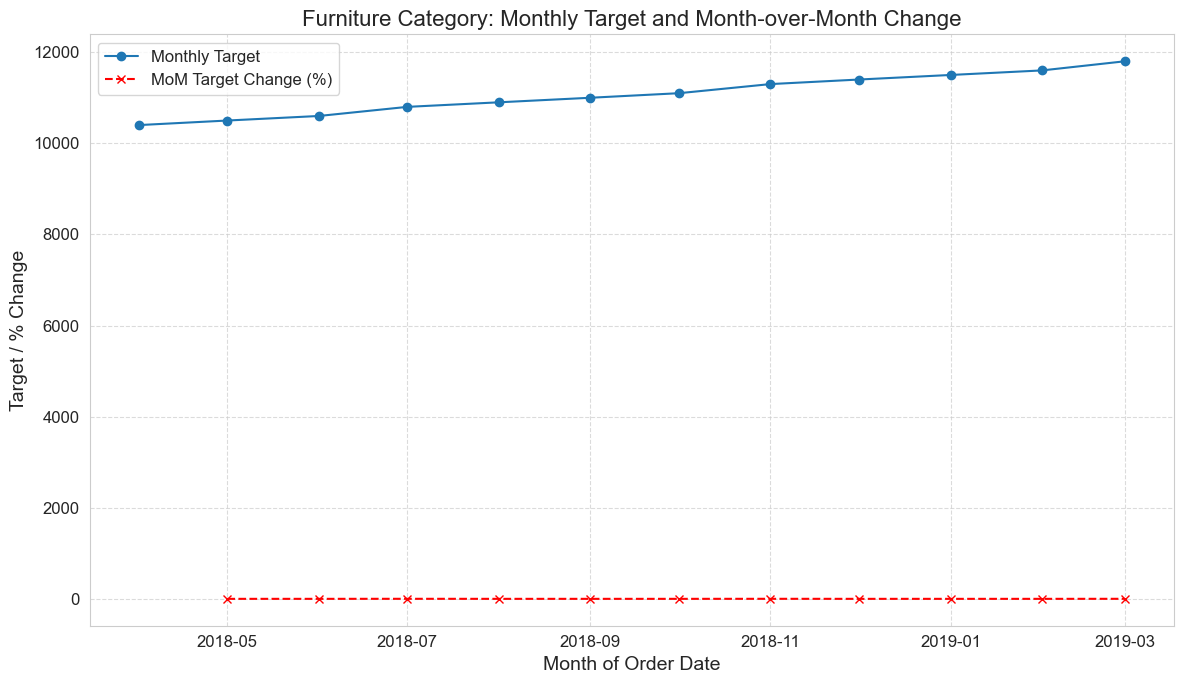

In [11]:
# Filter for 'Furniture' category targets
furniture_target = df_sales_target[df_sales_target['Category'] == 'Furniture'].copy()

# Sort by 'Month of Order Date' to ensure correct calculation of percentage change
furniture_target.sort_values(by='Month of Order Date', inplace=True)

# Calculate Month-over-Month Percentage Change in Target
# (Current Month Target - Previous Month Target) / Previous Month Target * 100
furniture_target['Target_MoM_Change_%'] = furniture_target['Target'].pct_change() * 100

print("\n--- Furniture Target with Month-over-Month Change ---")
print(furniture_target)

# Visualization of Furniture Target and MoM Change
plt.figure(figsize=(12, 7))
plt.plot(furniture_target['Month of Order Date'], furniture_target['Target'], marker='o', label='Monthly Target')
plt.plot(furniture_target['Month of Order Date'], furniture_target['Target_MoM_Change_%'], marker='x', linestyle='--', color='red', label='MoM Target Change (%)')
plt.title('Furniture Category: Monthly Target and Month-over-Month Change')
plt.xlabel('Month of Order Date')
plt.ylabel('Target / % Change')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Part 2: Target Achievement Analysis

### Using the Sales Target dataset, calculate the percentage change in target sales for the Furniture category month-over-month.

In [12]:
print("\n--- Months with Significant Furniture Target Fluctuations ---")
# Define a threshold for "significant fluctuation" (e.g., > 10% change)
fluctuation_threshold = 5.0

significant_fluctuations = furniture_target[
    (furniture_target['Target_MoM_Change_%'].abs() >= fluctuation_threshold)
].dropna() # dropna to remove the first NaN row for pct_change

if not significant_fluctuations.empty:
    print(f"Months with target fluctuations >= {fluctuation_threshold}%:")
    print(significant_fluctuations[['Month of Order Date', 'Target', 'Target_MoM_Change_%']])
else:
    print(f"No months with target fluctuations >= {fluctuation_threshold}% found.")

# Further analysis: Identify actual high/low months
highest_target_month = furniture_target.loc[furniture_target['Target'].idxmax()]
lowest_target_month = furniture_target.loc[furniture_target['Target'].idxmin()]

print(f"\nMonth with Highest Furniture Target: {highest_target_month['Month of Order Date'].strftime('%b-%Y')} (Target: {highest_target_month['Target']})")
print(f"Month with Lowest Furniture Target: {lowest_target_month['Month of Order Date'].strftime('%b-%Y')} (Target: {lowest_target_month['Target']})")


--- Months with Significant Furniture Target Fluctuations ---
No months with target fluctuations >= 5.0% found.

Month with Highest Furniture Target: Mar-2019 (Target: 11800.0)
Month with Lowest Furniture Target: Apr-2018 (Target: 10400.0)


### Analyse the trends to identify months with significant target fluctuations. Suggest strategies for aligning target expectations with actual performance trends.


--- Top 5 States by Order Count ---
State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: Order ID, dtype: int64


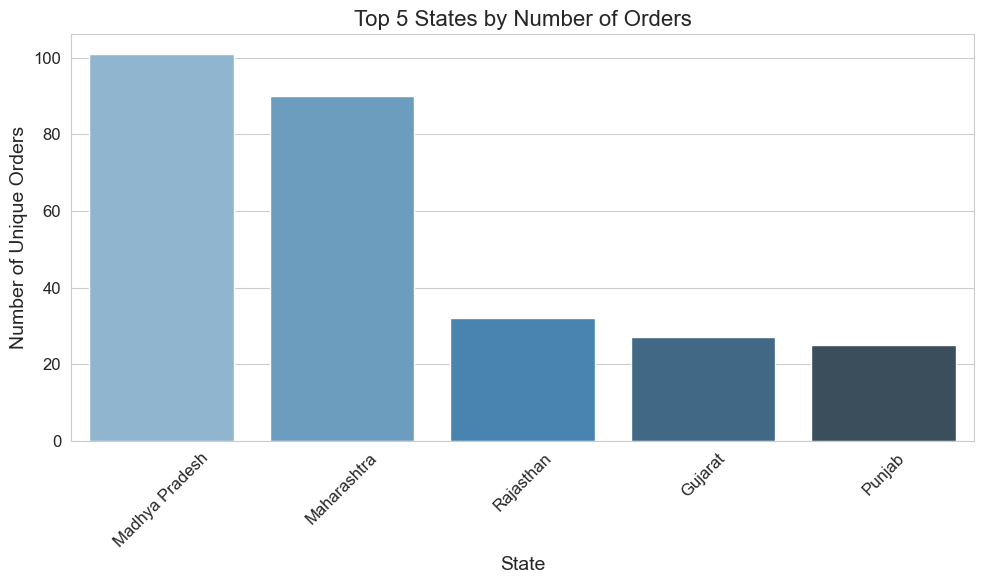

In [36]:
# Group by State and count unique Order IDs
orders_by_state = df_merged_sales.groupby('State')['Order ID'].nunique().sort_values(ascending=False)

# Get the top 5 states
top_5_states_order_count = orders_by_state.head(5)

print("\n--- Top 5 States by Order Count ---")
print(top_5_states_order_count)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states_order_count.index, y=top_5_states_order_count.values, hue=top_5_states_order_count.index, palette='Blues_d')
plt.title('Top 5 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 3: Regional Performance Insights

### From the List of Orders dataset, identify the top 5 states with the highest order count. For each of these states, calculate the total sales and average profit.



--- Sales and Profitability for Top 5 States by Order Count ---
                Total_Sales  Total_Profit  Average_Profit
State                                                    
Madhya Pradesh     105140.0        5551.0       16.326471
Maharashtra         95348.0        6176.0       21.296552
Rajasthan           21149.0        1257.0       16.986486
Gujarat             21058.0         465.0        5.344828
Punjab              16786.0        -609.0      -10.150000


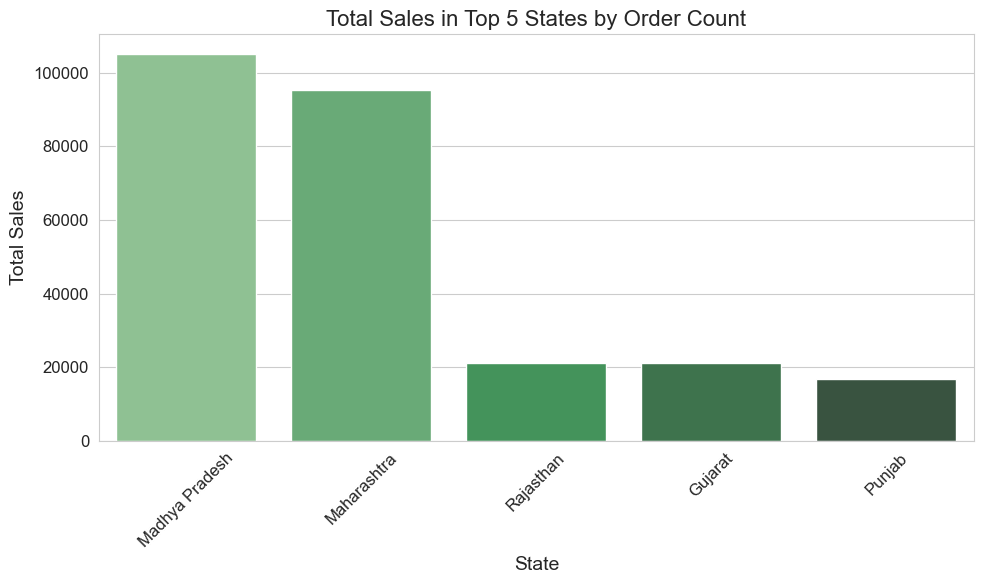

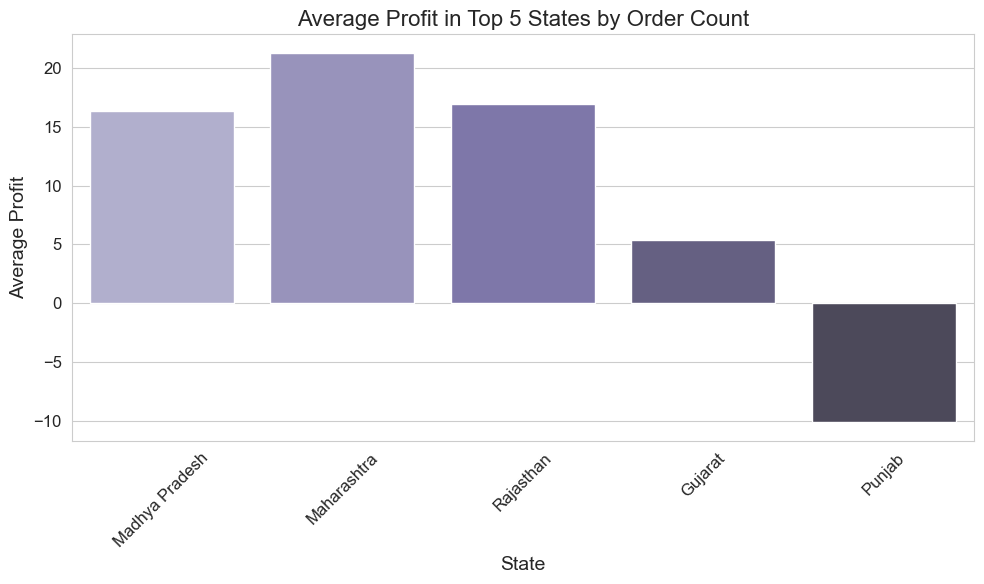

In [38]:
# Filter merged data for the top 5 states
top_states_data = df_merged_sales[df_merged_sales['State'].isin(top_5_states_order_count.index)].copy()

# Calculate total sales and average profit for these top states
regional_performance = top_states_data.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit=('Profit', 'mean')
).sort_values(by='Total_Sales', ascending=False) # Sort by Total_Sales for display

print("\n--- Sales and Profitability for Top 5 States by Order Count ---")
print(regional_performance)

# Visualization of Total Sales by Top States
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_performance.index, y='Total_Sales', data=regional_performance, hue = regional_performance.index, palette='Greens_d')
plt.title('Total Sales in Top 5 States by Order Count')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Average Profit by Top States
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_performance.index, y='Average_Profit', data=regional_performance, hue = regional_performance.index, palette='Purples_d')
plt.title('Average Profit in Top 5 States by Order Count')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Highlight any regional disparities in sales or profitability. Suggest regions or cities that should be prioritized for improvement.


--- Regional Disparities and Prioritization Suggestions ---

Detailed Regional Performance:
                Total_Sales  Total_Profit  Average_Profit
State                                                    
Madhya Pradesh     105140.0        5551.0       16.326471
Maharashtra         95348.0        6176.0       21.296552
Rajasthan           21149.0        1257.0       16.986486
Gujarat             21058.0         465.0        5.344828
Punjab              16786.0        -609.0      -10.150000

Regional Performance including Profit Margin:
                Total_Sales  Total_Profit  Average_Profit  Profit_Margin_%
State                                                                     
Maharashtra         95348.0        6176.0       21.296552         6.477325
Rajasthan           21149.0        1257.0       16.986486         5.943543
Madhya Pradesh     105140.0        5551.0       16.326471         5.279627
Gujarat             21058.0         465.0        5.344828         2.208187
Punj

C:\Users\jainm\AppData\Local\Temp\ipykernel_24204\3346355417.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total_Sales', data=city_performance, palette='viridis')


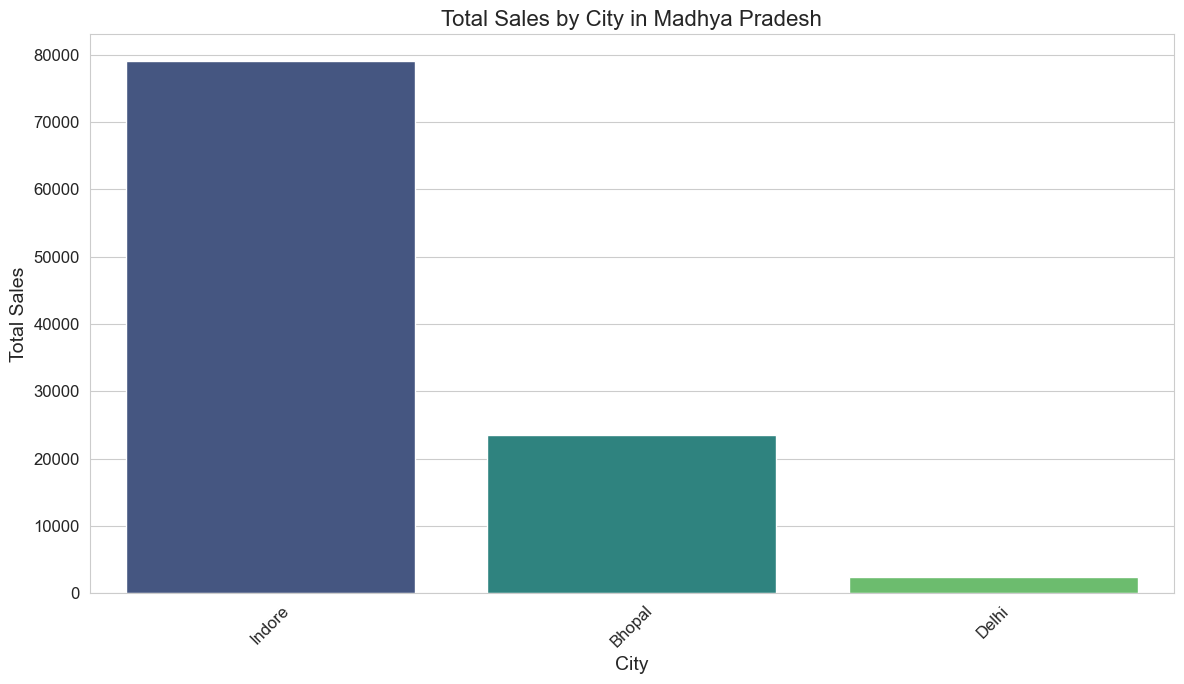

C:\Users\jainm\AppData\Local\Temp\ipykernel_24204\3346355417.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Profit_Margin_%', data=city_performance, palette='magma')


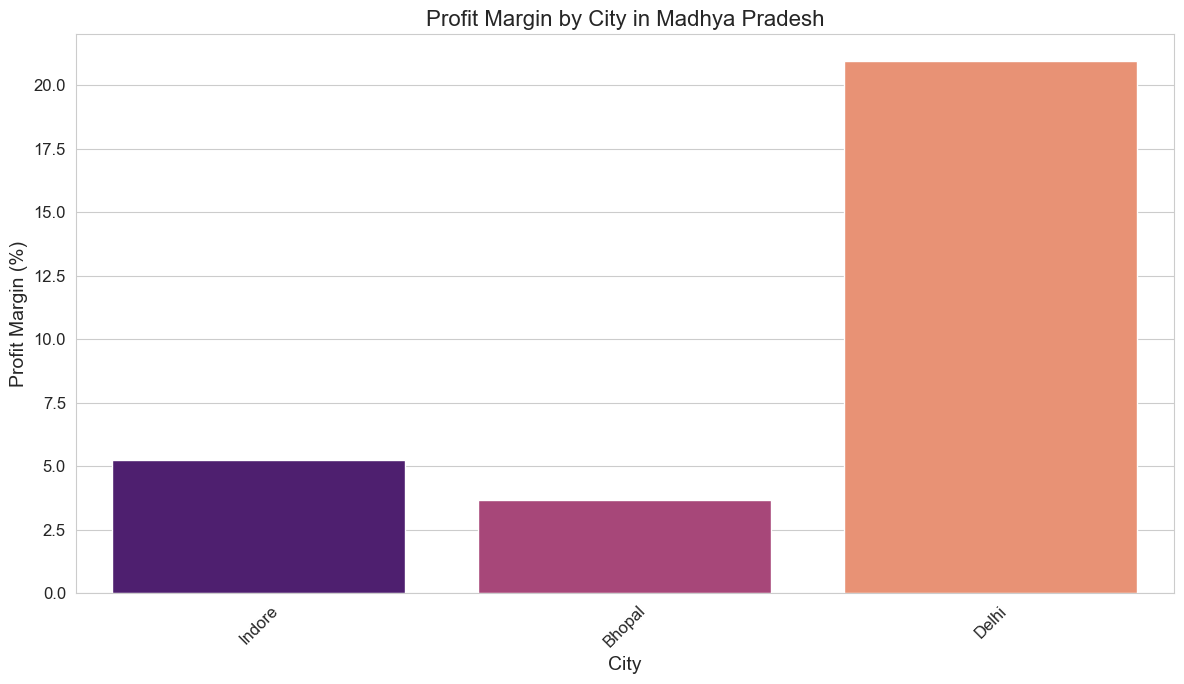

In [15]:
print("\n--- Regional Disparities and Prioritization Suggestions ---")

# Analyze regional_performance DataFrame
print("\nDetailed Regional Performance:")
print(regional_performance)

# Identify disparities
# Look for states with high order count but relatively lower sales or average profit.
# Look for states with high sales but low profit, indicating efficiency issues.

# Example disparity analysis:
# Calculate profit margin per state for better comparison
regional_performance['Profit_Margin_%'] = (regional_performance['Total_Profit'] / regional_performance['Total_Sales']) * 100
print("\nRegional Performance including Profit Margin:")
print(regional_performance.sort_values(by='Profit_Margin_%', ascending=False))

# Identify best/worst performing states based on profit margin
best_profit_state = regional_performance.loc[regional_performance['Profit_Margin_%'].idxmax()]
worst_profit_state = regional_performance.loc[regional_performance['Profit_Margin_%'].idxmin()]

print(f"\nState with Highest Profit Margin: {best_profit_state.name} ({best_profit_state['Profit_Margin_%']:.2f}%)")
print(f"State with Lowest Profit Margin: {worst_profit_state.name} ({worst_profit_state['Profit_Margin_%']:.2f}%)")

# To suggest cities, we need to extend the analysis to cities within these states.
# Let's pick a high-volume state and analyze its cities.
state_to_analyze_cities = top_5_states_order_count.index[0] # Example: highest order count state
print(f"\n--- Detailed City-level Analysis for {state_to_analyze_cities} ---")
city_performance = df_merged_sales[df_merged_sales['State'] == state_to_analyze_cities].groupby('City').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order ID', 'nunique'),
    Average_Profit_Per_Order=('Profit', lambda x: x.sum() / x.nunique() if x.nunique() > 0 else 0)
).reset_index()

city_performance['Profit_Margin_%'] = (city_performance['Total_Profit'] / city_performance['Total_Sales']) * 100
city_performance = city_performance.sort_values(by='Total_Sales', ascending=False)

print(city_performance)

# Visualization of City Sales in the selected state
plt.figure(figsize=(12, 7))
sns.barplot(x='City', y='Total_Sales', data=city_performance, palette='viridis')
plt.title(f'Total Sales by City in {state_to_analyze_cities}')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of City Profit Margin in the selected state
plt.figure(figsize=(12, 7))
sns.barplot(x='City', y='Profit_Margin_%', data=city_performance, palette='magma')
plt.title(f'Profit Margin by City in {state_to_analyze_cities}')
plt.xlabel('City')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()